## Data Sources:
- Memory Alpha for Metadata & Summaries
- Chakoteya.com for Lines

## Tasks

* scrape lines
* scrape episodes list w/ metadata
* scrape episodes' summaries

* cleaning & exploration
    * NAs
    * duplicates
    * dates
    * titles [need to match in both sources]
    * lines & characters (#)
    * text (#)
    
(#) remove website specific parts e.g. copyright statements [pre-cleaning step]

* explore
    - how many episodes
    - how many lines / per series / per episode / per character
    - how many characters / per series 

* build corpus [script/function to clean long text]
    1. expansion
    2. normalization
    3. tokenization
    4. stop words removal
    5. stemming / lemmatization
    
## Before Modeling

* Datasets
    - episode list w/ metadata
        | Series | Seasons | Episodes | Originally released | In Dataset |
        | :----: | :----: | :----: | :----: | :----: |
    - episode lines joined to transcript w/o characters w/ metadata
        | Series | Seasons | Episodes | Originally released | In Dataset |
        | :----: | :----: | :----: | :----: | :----: |
    - episode lines w/ characters & metadata
        | Series | Seasons | Episodes | Originally released | In Dataset |
        | :----: | :----: | :----: | :----: | :----: |
    - episode summaries w/ metadata
        | Series | Seasons | Episodes | Originally released | In Dataset |
        | :----: | :----: | :----: | :----: | :----: |
    
* Document-Term-Matrix
    - corpus 1: transcripts
    - corpus 2: summaries

## Concepts & mathematical representations

* Document-Term-Matrix
* Bag-of-Words & alternative: Word2Vec
* tf-idf & term frequency, document frequency, idf / log
* normalization
* expansion
* tokenization
* stop words
* stemming
* lemmatization
* term
* document
* corpus

## Scraping

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from collections import defaultdict
import pandas as pd

### Episodes List & Metadata

In [2]:
# Memory Alpha Star Trek root url
root_url = "https://memory-alpha.fandom.com/wiki/Star_Trek:_"

# List of series names
series_names = ["The Original Series", "The Animated Series", "The Next Generation", "Deep Space Nine",
        "Voyager", "Enterprise", "Discovery", "Picard ", "Lower Decks"]

In [3]:
# create list of link to series pages
series_links = []

for name in series_names:
    name = name.replace(' ', '_')
    series_links.append(root_url + name)

In [14]:
series_links

['https://memory-alpha.fandom.com/wiki/Star_Trek:_The_Original_Series',
 'https://memory-alpha.fandom.com/wiki/Star_Trek:_The_Animated_Series',
 'https://memory-alpha.fandom.com/wiki/Star_Trek:_The_Next_Generation',
 'https://memory-alpha.fandom.com/wiki/Star_Trek:_Deep_Space_Nine',
 'https://memory-alpha.fandom.com/wiki/Star_Trek:_Voyager',
 'https://memory-alpha.fandom.com/wiki/Star_Trek:_Enterprise',
 'https://memory-alpha.fandom.com/wiki/Star_Trek:_Discovery',
 'https://memory-alpha.fandom.com/wiki/Star_Trek:_Picard_',
 'https://memory-alpha.fandom.com/wiki/Star_Trek:_Lower_Decks']

In [430]:
episodes_tbl_dict = defaultdict(dict)

for i, name in enumerate(series_names):
    # create link to series main page
    name = name.replace(' ', '_')
    url = root_url + name
    # get page content
    website_url = requests.get(url).text
    soup = BeautifulSoup(website_url, 'lxml')
    # get series abbreviation
    abbr = soup.find("aside", {"class": "portable-infobox"}) \
        .find("div", {"data-source": "abbr"}) \
        .find("div", {"class": "pi-data-value"}).get_text(strip=True)
    abbr = re.sub('[^A-Za-z0-9]+', '', abbr)
    
    page_url = root_url + name
    
    # Scrape main page for each series
    series_page_url = requests.get(page_url).text
    soup = BeautifulSoup(series_page_url, 'html.parser')

    # get episodes table
    tables = soup.find_all("table", {"class": "grey sortable"})
    episodes_tbl_dict[abbr] = tables
    
    print(series_names[i], " done...")

The Original Series  done...
The Animated Series  done...
The Next Generation  done...
Deep Space Nine  done...
Voyager  done...
Enterprise  done...
Discovery  done...
Picard   done...
Lower Decks  done...


In [431]:
#episodes_tbl_dict['TOS'][3]
pd.read_html(str(episodes_tbl_dict['TOS'][3]))[0]

,Title,Episode,Prodno.,Stardate,Original Airdate,Remastered Airdate
0,Spectre of the Gun,3x01,60043-56,4385.3,1968-10-25,2008-07-19
1,Elaan of Troyius,3x02,60043-57,4372.5,1968-12-20,2008-03-29
2,The Paradise Syndrome,3x03,60043-58,4842.6 - 4843.6,1968-10-04,2007-02-24
3,The Enterprise Incident,3x04,60043-59,5027.3 - 5027.4,1968-09-27,2008-04-05
4,And the Children Shall Lead,3x05,60043-60,5029.5,1968-10-11,2007-04-14
5,Spock's Brain,3x06,60043-61,5431.4 - 5432.3,1968-09-20,2007-06-09
6,Is There in Truth No Beauty?,3x07,60043-62,5630.7 - 5630.8,1968-10-18,2008-03-22
7,The Empath,3x08,60043-63,5121.5,1968-12-06,2008-07-26
8,The Tholian Web,3x09,60043-64,5693.2,1968-11-15,2007-03-31
9,For the World is Hollow and I Have Touched the...,3x10,60043-65,5476.3 - 5476.4,1968-11-08,2007-01-27


In [432]:
episodes_tbl_dict.keys()

dict_keys(['TOS', 'TAS', 'TNG', 'DS9', 'VOY', 'ENT', 'DIS', 'PIC', 'LD'])

In [311]:
dfs_list = []

for key, value in episodes_tbl_dict.items():
    print(key)
    tables = value
    #print(type(tables))
    episodes_tbls = episodes_tbl_dict[key]
    for i, table in enumerate(episodes_tbls):
        pd_table = pd.read_html(str(table))[0]
        # if df has a second index lelev, e.g. chapters in Discovery series
        if isinstance(pd_table.index, pd.MultiIndex):
            pd_table.columns = pd_table.columns.droplevel(1)
        else:
            pass
        pd_table['Abbr.'] = key
        print(pd_table)
        dfs_list.append(pd_table)

TOS
      Title Episode  Prodno. Stardate Original Airdate Remastered Airdate  \
0  The Cage    0x01  6149-01  Unknown       1988-10-04         2009-05-02   

  Abbr.  
0   TOS  
                              Title Episode   Prodno.         Stardate  \
0      Where No Man Has Gone Before    1x01   6149-02  1312.4 - 1313.8   
1            The Corbomite Maneuver    1x02   6149-03  1512.2 - 1514.1   
2                      Mudd's Women    1x03   6149-04  1329.8 - 1330.1   
3                  The Enemy Within    1x04   6149-05  1672.1 - 1673.1   
4                      The Man Trap    1x05   6149-06  1513.1 - 1513.8   
5                    The Naked Time    1x06   6149-07  1704.2 - 1704.4   
6                         Charlie X    1x07   6149-08  1533.6 - 1535.8   
7                 Balance of Terror    1x08   6149-09  1709.2 - 1709.6   
8    What Are Little Girls Made Of?    1x09   6149-10           2712.4   
9                Dagger of the Mind    1x10   6149-11  2715.1 - 2715.2   
10     

                      Title Episode    Prodno.  Stardate Original Airdate  \
0                 The Child    2x01  40272-127   42073.1       1988-11-21   
1   Where Silence Has Lease    2x02  40272-128   42193.6       1988-11-28   
2     Elementary, Dear Data    2x03  40272-129   42286.3       1988-12-05   
3      The Outrageous Okona    2x04  40272-130   42402.7       1988-12-12   
4         Loud As A Whisper    2x05  40272-132   42477.2       1989-01-09   
5          The Schizoid Man    2x06  40272-131   42437.5       1989-01-23   
6       Unnatural Selection    2x07  40272-133   42494.8       1989-01-30   
7         A Matter Of Honor    2x08  40272-134   42506.5       1989-02-06   
8      The Measure Of A Man    2x09  40272-135   42523.7       1989-02-13   
9               The Dauphin    2x10  40272-136   42568.8       1989-02-20   
10                Contagion    2x11  40272-137   42609.1       1989-03-20   
11               The Royale    2x12  40272-138   42625.4       1989-03-27   

                   Title Episode    Prodno.         Stardate Original Airdate  \
0         The Homecoming    2x01  40512-421          Unknown       1993-09-26   
1             The Circle    2x02  40512-422          Unknown       1993-10-03   
2              The Siege    2x03  40512-423          Unknown       1993-10-10   
3    Invasive Procedures    2x04  40512-424          47182.1       1993-10-17   
4            Cardassians    2x05  40512-425          47177.2       1993-10-24   
5                 Melora    2x06  40512-426          47229.1       1993-10-31   
6   Rules of Acquisition    2x07  40512-427          Unknown       1993-11-06   
7         Necessary Evil    2x08  40512-428  47282.5-47284.1       1993-11-14   
8           Second Sight    2x09  40512-429          47329.4       1993-11-20   
9              Sanctuary    2x10  40512-430          47391.2       1993-11-28   
10                Rivals    2x11  40512-431          Unknown       1994-01-02   
11         The Alternate    

                       Title  Episode  Prodno.   Stardate Original Airdate  \
0                      Night     5x01      195    52081.2       1998-10-14   
1                      Drone     5x02      196    Unknown       1998-10-21   
2               Extreme Risk     5x03      197    Unknown       1998-10-28   
3               In the Flesh     5x04      198    52136.4       1998-11-04   
4           Once Upon a Time     5x05      199    Unknown       1998-11-11   
5                   Timeless     5x06      201    52164.3       1998-11-18   
6           Infinite Regress     5x07      203    52356.2       1998-11-25   
7              Nothing Human     5x08      200    Unknown       1998-12-02   
8                Thirty Days     5x09      202    52179.4       1998-12-09   
9               Counterpoint     5x10      204    Unknown       1998-12-16   
10              Latent Image     5x11      206    Unknown       1999-01-20   
11        Bride of Chaotica!     5x12      207    Unknown       

                    Title Episode  Prodno. Stardate Original Airdate Abbr.
0          Second Contact    1x01  LD-1001  57436.2       2020-08-06    LD
1                  Envoys    1x02  LD-1002  Unknown       2020-08-13    LD
2          Temporal Edict    1x03  LD-1003  57501.4       2020-08-20    LD
3            Moist Vessel    1x04  LD-1004  57538.9       2020-08-27    LD
4    Cupid's Errant Arrow    1x05  LD-1005  57601.3       2020-09-03    LD
5   Terminal Provocations    1x06  LD-1006  57663.9       2020-09-10    LD
6  Much Ado About Boimler    1x07  LD-1007  57752.6       2020-09-17    LD
7                 Veritas    1x08  LD-1008  Unknown       2020-09-24    LD
8            Crisis Point    1x09  LD-1009  Unknown       2020-10-01    LD
9          No Small Parts    1x10  LD-1010  Unknown       2020-10-08    LD
         Title Episode  Prodno. Stardate Original Airdate Abbr.
0   Episode 11    2x01      201  Unknown       2021-08-12    LD
1   Episode 12    2x02      202  Unknown       

In [331]:
combined_dfs = pd.concat(dfs_list)

In [332]:
combined_dfs.reset_index(drop=True, inplace=True)

In [433]:
display(combined_dfs.head(5))

,Abbr_1,Abbr.,Date,Episode,EpisodeChapter_One,Original_Airdate,Original_airdate,Original_AirdateChapter_One,Prodno.,Production_number,...,Stardate,StardateChapter_One,Title,TitleChapter_One,episode,title,Abbr,stardate,original_airdate,production_number
0,TOS,NaN,NaN,0x01,NaN,1988-10-04,NaN,NaN,6149-01,NaN,...,Unknown,NaN,The Cage,NaN,0x01,The Cage,TOS,Unknown,1988-10-04,6149-01
1,TOS,NaN,NaN,1x01,NaN,1966-09-22,NaN,NaN,6149-02,NaN,...,1312.4 - 1313.8,NaN,Where No Man Has Gone Before,NaN,1x01,Where No Man Has Gone Before,TOS,1312.4 - 1313.8,1966-09-22,6149-02
2,TOS,NaN,NaN,1x02,NaN,1966-11-10,NaN,NaN,6149-03,NaN,...,1512.2 - 1514.1,NaN,The Corbomite Maneuver,NaN,1x02,The Corbomite Maneuver,TOS,1512.2 - 1514.1,1966-11-10,6149-03
3,TOS,NaN,NaN,1x03,NaN,1966-10-13,NaN,NaN,6149-04,NaN,...,1329.8 - 1330.1,NaN,Mudd's Women,NaN,1x03,Mudd's Women,TOS,1329.8 - 1330.1,1966-10-13,6149-04
4,TOS,NaN,NaN,1x04,NaN,1966-10-06,NaN,NaN,6149-05,NaN,...,1672.1 - 1673.1,NaN,The Enemy Within,NaN,1x04,The Enemy Within,TOS,1672.1 - 1673.1,1966-10-06,6149-05


In [294]:
def combine_two_cols(a, b):
    result = ''
    if pd.isnull(a):
        result = b   
    else:
        result = a
    return result

In [340]:
def combine_three_cols(a, b, c):
    result = ''
    if pd.isnull(a):
        if pd.isnull(b):
            return c
        else:
            return b
    else:
        result = a
    return result

In [334]:
combined_dfs.rename(columns={'Abbr.': 'Abbr_1'}, inplace = True)

combined_dfs.rename(columns=''.join, inplace=True)

combined_dfs.columns = combined_dfs.columns.str.strip().str.replace(' ', '_')

In [335]:
combined_dfs.columns

Index(['Abbr_1', 'Abbr.', 'Date', 'Episode', 'EpisodeChapter_One',
       'Original_Airdate', 'Original_airdate', 'Original_AirdateChapter_One',
       'Prodno.', 'Production_number', 'Prodno.Chapter_One',
       'Remastered_Airdate', 'Stardate', 'StardateChapter_One', 'Title',
       'TitleChapter_One'],
      dtype='object')

In [336]:
# clean up episode ids
combined_dfs['episode'] = combined_dfs.apply(lambda row : combine_two_cols(row['Episode'], \
                                                row["EpisodeChapter_One"]), axis = 1)

# clean up episode titles
combined_dfs['title'] = combined_dfs.apply(lambda row : combine_two_cols(row['Title'], \
                                                row["TitleChapter_One"]), axis = 1)

# clean up series abbreviations
combined_dfs['abbr'] = combined_dfs.apply(lambda row : combine_two_cols(row['Abbr_1'], \
                                                row["Abbr."]), axis = 1)

# clean up stardates
combined_dfs['stardate'] = combined_dfs.apply(lambda row : combine_three_cols(row['Stardate'], \
                                                row["StardateChapter_One"], row['Date']), axis = 1)

# clean up original airdate
combined_dfs['original_airdate'] = combined_dfs.apply(lambda row : combine_three_cols(row['Original_Airdate'], \
                                                row["Original_airdate"], row['Original_AirdateChapter_One']), \
                                                      axis = 1)

# clean up production number
combined_dfs['production_number'] = combined_dfs.apply(lambda row : combine_three_cols(row['Prodno.'], \
                                                row["Production_number"], row['Prodno.Chapter_One']), \
                                                      axis = 1)

In [346]:
combined_dfs

,Abbr_1,Abbr.,Date,Episode,EpisodeChapter_One,Original_Airdate,Original_airdate,Original_AirdateChapter_One,Prodno.,Production_number,...,Stardate,StardateChapter_One,Title,TitleChapter_One,episode,title,Abbr,stardate,original_airdate,production_number
0,TOS,NaN,NaN,0x01,NaN,1988-10-04,NaN,NaN,6149-01,NaN,...,Unknown,NaN,The Cage,NaN,0x01,The Cage,TOS,Unknown,1988-10-04,6149-01
1,TOS,NaN,NaN,1x01,NaN,1966-09-22,NaN,NaN,6149-02,NaN,...,1312.4 - 1313.8,NaN,Where No Man Has Gone Before,NaN,1x01,Where No Man Has Gone Before,TOS,1312.4 - 1313.8,1966-09-22,6149-02
2,TOS,NaN,NaN,1x02,NaN,1966-11-10,NaN,NaN,6149-03,NaN,...,1512.2 - 1514.1,NaN,The Corbomite Maneuver,NaN,1x02,The Corbomite Maneuver,TOS,1512.2 - 1514.1,1966-11-10,6149-03
3,TOS,NaN,NaN,1x03,NaN,1966-10-13,NaN,NaN,6149-04,NaN,...,1329.8 - 1330.1,NaN,Mudd's Women,NaN,1x03,Mudd's Women,TOS,1329.8 - 1330.1,1966-10-13,6149-04
4,TOS,NaN,NaN,1x04,NaN,1966-10-06,NaN,NaN,6149-05,NaN,...,1672.1 - 1673.1,NaN,The Enemy Within,NaN,1x04,The Enemy Within,TOS,1672.1 - 1673.1,1966-10-06,6149-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,LD,NaN,NaN,2x08,NaN,2021-09-30,NaN,NaN,208,NaN,...,Unknown,NaN,Episode 18,NaN,2x08,Episode 18,LD,Unknown,2021-09-30,208
787,LD,NaN,NaN,2x09,NaN,2021-10-07,NaN,NaN,209,NaN,...,Unknown,NaN,Episode 19,NaN,2x09,Episode 19,LD,Unknown,2021-10-07,209
788,LD,NaN,NaN,2x10,NaN,2021-10-14,NaN,NaN,210,NaN,...,Unknown,NaN,Episode 20,NaN,2x10,Episode 20,LD,Unknown,2021-10-14,210
789,LD,NaN,NaN,2x11,NaN,2021-10-21,NaN,NaN,211,NaN,...,Unknown,NaN,Episode 21,NaN,2x11,Episode 21,LD,Unknown,2021-10-21,211


In [347]:
combined_dfs.columns

Index(['Abbr_1', 'Abbr.', 'Date', 'Episode', 'EpisodeChapter_One',
       'Original_Airdate', 'Original_airdate', 'Original_AirdateChapter_One',
       'Prodno.', 'Production_number', 'Prodno.Chapter_One',
       'Remastered_Airdate', 'Stardate', 'StardateChapter_One', 'Title',
       'TitleChapter_One', 'episode', 'title', 'Abbr', 'stardate',
       'original_airdate', 'production_number'],
      dtype='object')

In [349]:
print(combined_dfs.shape)

(791, 22)


In [348]:
combined_dfs.isna().sum()

Abbr_1                          16
Abbr.                          775
Date                           694
Episode                         16
EpisodeChapter_One             775
Original_Airdate               113
Original_airdate               694
Original_AirdateChapter_One    775
Prodno.                        113
Production_number              694
Prodno.Chapter_One             775
Remastered_Airdate             711
Stardate                       113
StardateChapter_One            775
Title                           16
TitleChapter_One               775
episode                          0
title                            0
Abbr                             0
stardate                         0
original_airdate                 0
production_number                0
dtype: int64

In [350]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

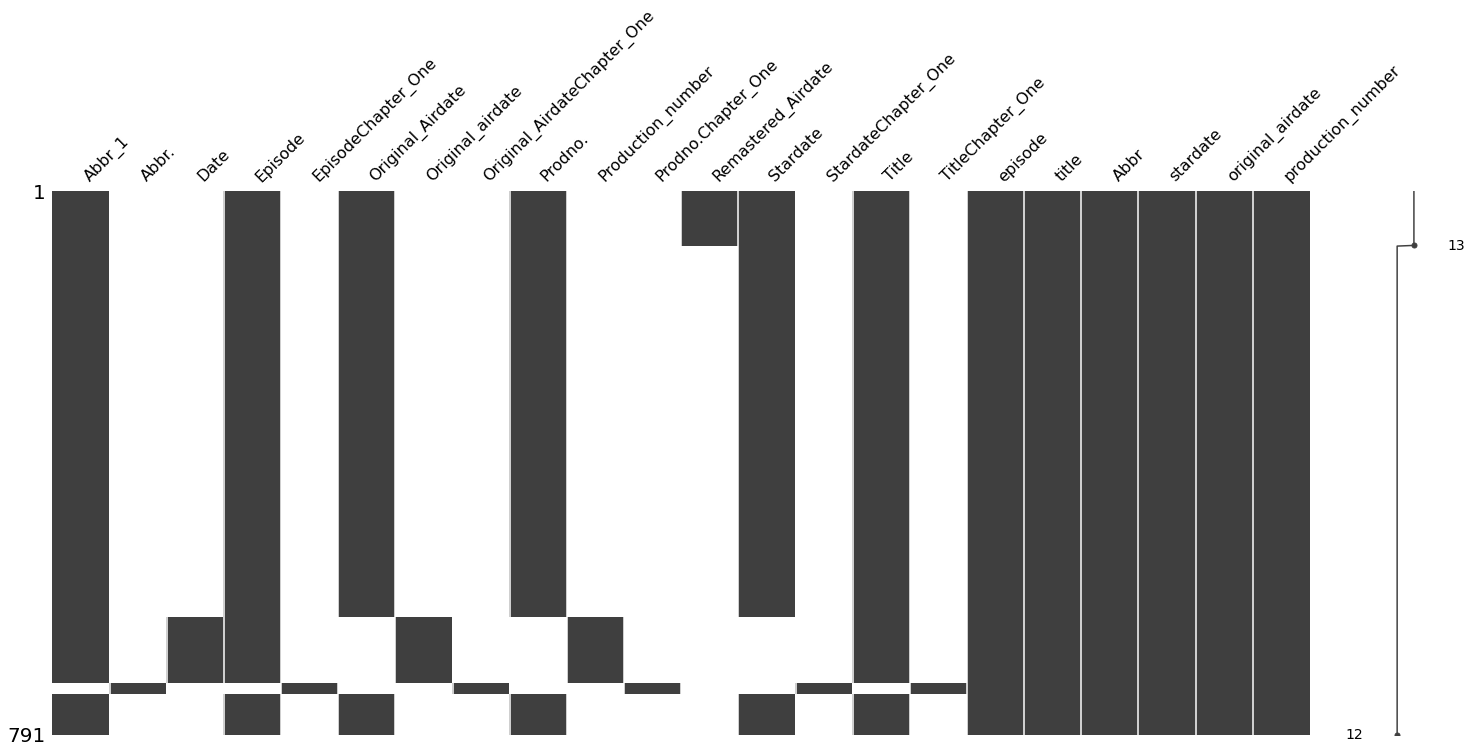

In [351]:
msno.matrix(combined_dfs)

In [353]:
# drop unnecessary columns
cols_to_drop = ['Abbr_1', 'Abbr.', 'Date', 'Episode', 'EpisodeChapter_One',
       'Original_Airdate', 'Original_airdate', 'Original_AirdateChapter_One',
       'Prodno.', 'Production_number', 'Prodno.Chapter_One',
       'Remastered_Airdate', 'Stardate', 'StardateChapter_One', 'Title',
       'TitleChapter_One']

st_metadata_df = combined_dfs.drop(cols_to_drop, axis=1)

In [354]:
st_metadata_df

,episode,title,Abbr,stardate,original_airdate,production_number
0,0x01,The Cage,TOS,Unknown,1988-10-04,6149-01
1,1x01,Where No Man Has Gone Before,TOS,1312.4 - 1313.8,1966-09-22,6149-02
2,1x02,The Corbomite Maneuver,TOS,1512.2 - 1514.1,1966-11-10,6149-03
3,1x03,Mudd's Women,TOS,1329.8 - 1330.1,1966-10-13,6149-04
4,1x04,The Enemy Within,TOS,1672.1 - 1673.1,1966-10-06,6149-05
...,...,...,...,...,...,...
786,2x08,Episode 18,LD,Unknown,2021-09-30,208
787,2x09,Episode 19,LD,Unknown,2021-10-07,209
788,2x10,Episode 20,LD,Unknown,2021-10-14,210
789,2x11,Episode 21,LD,Unknown,2021-10-21,211


In [357]:
st_metadata_df.dtypes

episode              object
title                object
Abbr                 object
stardate             object
original_airdate     object
production_number    object
dtype: object

[stackoverflow - Check if string has date, any format](https://stackoverflow.com/questions/25341945/check-if-string-has-date-any-format)

In [372]:


def is_date(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False


In [374]:
date_bool = st_metadata_df.apply(lambda row : is_date(row['original_airdate']), axis = 1)

In [379]:
st_metadata_df[date_bool == False].index

Int64Index([725], dtype='int64')

In [381]:
st_metadata_df = st_metadata_df.drop(st_metadata_df[date_bool == False].index)

In [384]:
st_metadata_df['original_airdate'] = pd.to_datetime(st_metadata_df['original_airdate'])

In [355]:
import matplotlib.pyplot as plt
%matplotlib inline

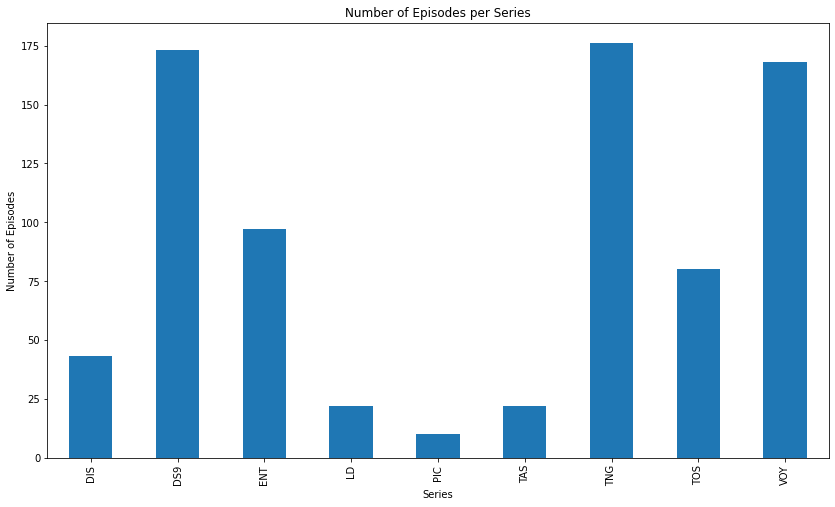

In [356]:
ax = st_metadata_df['Abbr'].value_counts().sort_index().plot(kind='bar',
                                         figsize=(14,8))
plt.xlabel('Series')
plt.ylabel('Number of Episodes')
plt.title('Number of Episodes per Series')
plt.show()

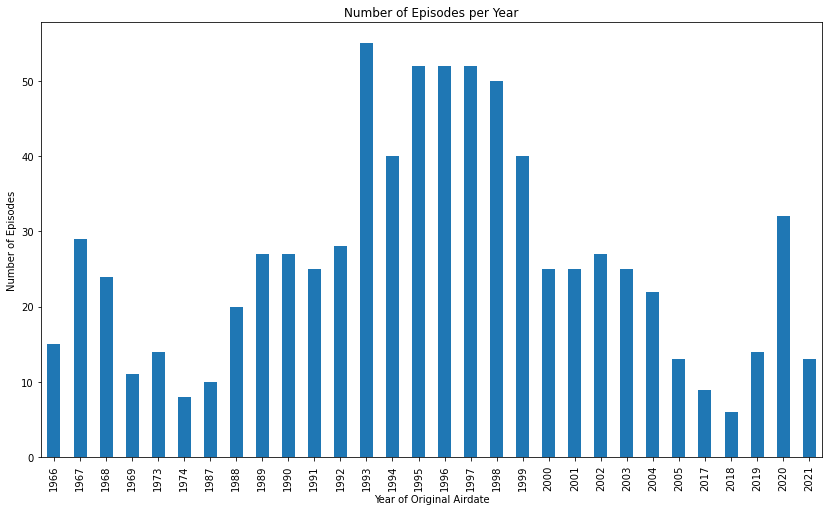

In [397]:
st_metadata_df.groupby(st_metadata_df["original_airdate"].dt.year)['episode'].count().plot(kind="bar", \
                                                                                           figsize=(14,8))

plt.xlabel('Year of Original Airdate')
plt.ylabel('Number of Episodes')
plt.title('Number of Episodes per Year')
plt.show()